<a href="https://colab.research.google.com/github/shivtejshete/Retail_Analytics/blob/main/Kaggle_Bosh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [148]:
import tensorflow as tf
import keras
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [149]:
!pip install kaggle

In [150]:
# Add this to external cookies allowed list   -  [*.]googleusercontent.com:443
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"shivtejshete","key":"d8a54598045a41f573268a96a799fc38"}'}

In [151]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [152]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

 80% 1.84G/2.29G [01:01<00:15, 32.0MB/s]
User cancelled operation


In [153]:
!kaggle datasets download -d manjeetsingh/retaildataset

retaildataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [154]:
!ls

 chest-xray-pneumonia.zip   kaggle.json   retaildataset.zip
'kaggle (1).json'	    retail	  sample_data


In [155]:
import zipfile
zip_ref = zipfile.ZipFile('retaildataset.zip' , 'r')
zip_ref.extractall('retail')
zip_ref.close()

In [156]:
os.listdir('/content/retail')

['Features data set.csv', 'sales data-set.csv', 'stores data-set.csv']

In [157]:
import os
root = os.getcwd()

_feature=root+'/retail/'+os.listdir('/content/retail')[0]
_sales=root+'/retail/'+os.listdir('/content/retail')[1]
_store=root+'/retail/'+os.listdir('/content/retail')[2]

In [158]:
import pandas as pd
features = pd.read_csv(_feature)
sales = pd.read_csv(_sales)
stores = pd.read_csv(_store)

In [159]:
sales.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


In [160]:
features

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,28/06/2013,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,05/07/2013,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,12/07/2013,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,19/07/2013,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [161]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


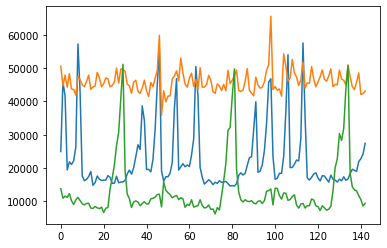

In [162]:
import matplotlib.pyplot as plt

m = sales[(sales.Store==1) & (sales.Dept==1)]
n = sales[(sales.Store==1) & (sales.Dept==2)].reset_index(drop = True)
o = sales[(sales.Store==1) & (sales.Dept==3)].reset_index(drop = True)
plt.plot(m.iloc[:,[3]])
plt.plot(n.iloc[:,[3]])
plt.plot(o.iloc[:,[3]])

In [163]:
#aggregate sales to weekly level inter-store
sales_agg = sales.pivot_table(index=['Store','Date','IsHoliday'], values=['Weekly_Sales'],aggfunc=np.sum).reset_index()

In [185]:
#left join features with sales
merged = pd.merge(features, sales_agg, how='left', on= ['Store', 'Date'], )

In [186]:
merged=merged.loc[:,['Store',
 'Date',
 'Temperature',
 'Fuel_Price',
 'MarkDown1',
 'MarkDown2',
 'MarkDown3',
 'MarkDown4',
 'MarkDown5',
 'CPI',
 'Unemployment',
 'IsHoliday_x',
 'Weekly_Sales']].merge(stores, how='left', on='Store')

In [187]:
merged.shape

(8190, 15)

In [166]:
from sklearn.impute import SimpleImputer
imputer1 = SimpleImputer(missing_values=np.nan, strategy='mean',)
merged.loc[:,['Unemployment']]= imputer1.fit_transform(merged.loc[:,['Unemployment']].values)

In [167]:
a= SimpleImputer(missing_values=np.nan, strategy='median',).fit_transform(merged.loc[:,['CPI']].values)

Store           8190
Date            8190
Temperature     8190
Fuel_Price      8190
MarkDown1       4032
MarkDown2       2921
MarkDown3       3613
MarkDown4       3464
MarkDown5       4050
CPI             7605
Unemployment    7605
IsHoliday_x     8190
Weekly_Sales    6435
Type            8190
Size            8190
dtype: int64


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 <a list of 15 Text major ticklabel objects>)

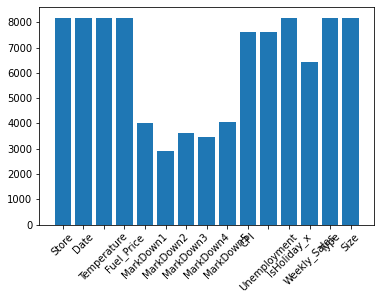

In [188]:
#visualizing non na values in Dataframe for purpose of data quality 
print(merged.count(axis=0))

columns = merged.columns
plt.bar(columns, merged.count(axis=0))
plt.xticks(rotation=45)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1547cc3a90>,
      dtype=object)

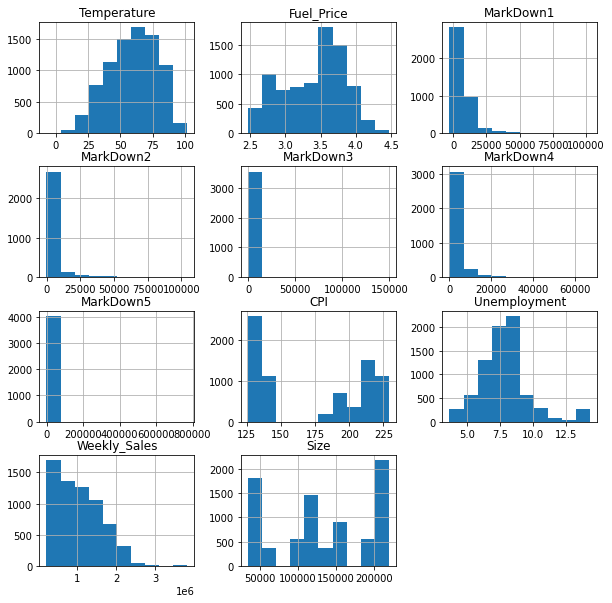

In [212]:
col =['Temperature',
 'Fuel_Price',
 'MarkDown1',
 'MarkDown2',
 'MarkDown3',
 'MarkDown4',
 'MarkDown5',
 'CPI',
 'Unemployment',
 'Weekly_Sales',
 'Type',
 'Size']
#plotting the histogram of numerical features to see the distribion of points
pd.plotting.hist_frame(merged.loc[:,col], figsize=(10,10))

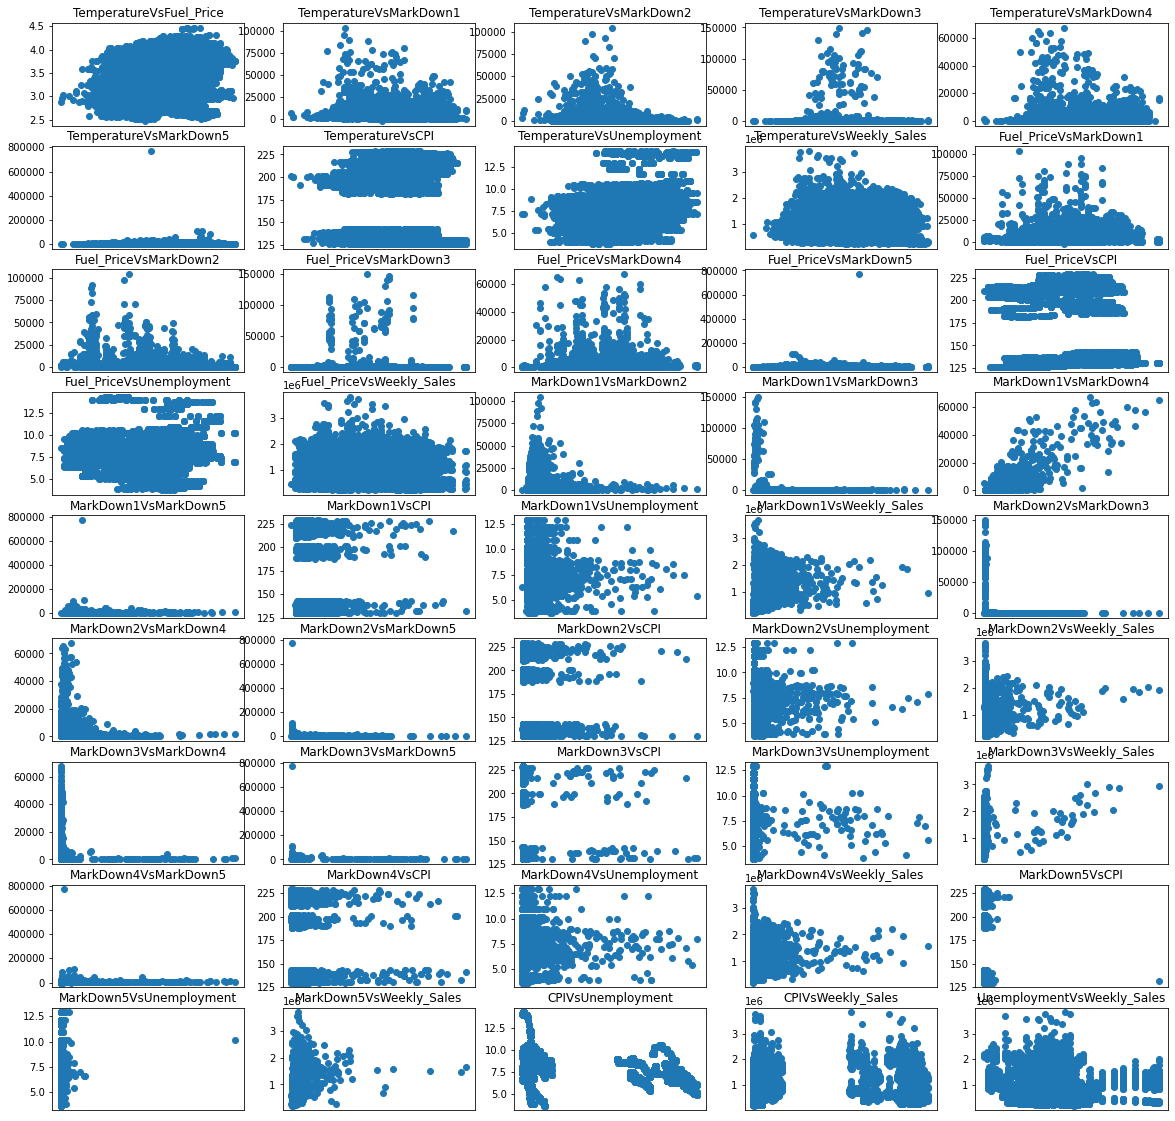

In [215]:
#visualizing the scatter plots of each variable
col = ['Temperature',
 'Fuel_Price',
 'MarkDown1',
 'MarkDown2',
 'MarkDown3',
 'MarkDown4',
 'MarkDown5',
 'CPI',
 'Unemployment',
 'Weekly_Sales']
import itertools 
combo = [list(i) for i in itertools.combinations(col,2)]
plt.figure(figsize=(20,20))

for i in range(45):
  plt.subplot(9,5,i+1)
  plt.scatter(merged.loc[:,combo[i]].iloc[:,0] , merged.loc[:,combo[i]].iloc[:,1])
  plt.title(combo[i][0]+'Vs'+combo[i][1])
  plt.xticks(ticks=[])



In [213]:
merged.iloc[:,1:].corr(method='spearman')

,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_x,Weekly_Sales,Size
Temperature,1.000000,0.099285,-0.116219,-0.401877,-0.140568,0.160056,-0.041520,0.121019,0.090026,-0.155535,-0.070962,-0.086719
Fuel_Price,0.099285,1.000000,0.156084,-0.110392,-0.132549,0.140630,-0.021889,-0.068086,-0.039765,-0.084376,0.025471,0.014256
MarkDown1,-0.116219,0.156084,1.000000,0.232740,0.217726,0.729056,0.557054,0.002473,0.048449,0.012899,0.551184,0.559538
MarkDown2,-0.401877,-0.110392,0.232740,1.000000,0.009247,0.080988,0.111566,-0.032724,0.018040,0.080642,0.113683,0.171532
MarkDown3,-0.140568,-0.132549,0.217726,0.009247,1.000000,0.048856,0.210455,-0.048408,-0.002781,0.212463,0.419940,0.315297
MarkDown4,0.160056,0.140630,0.729056,0.080988,0.048856,1.000000,0.407678,-0.093577,0.087846,-0.051837,0.348274,0.293110
MarkDown5,-0.041520,-0.021889,0.557054,0.111566,0.210455,0.407678,1.000000,0.016135,0.012147,-0.068654,0.603109,0.595371
CPI,0.121019,-0.068086,0.002473,-0.032724,-0.048408,-0.093577,0.016135,1.000000,-0.392809,0.004119,-0.055040,0.010249
Unemployment,0.090026,-0.039765,0.048449,0.018040,-0.002781,0.087846,0.012147,-0.392809,1.000000,-0.002518,-0.062354,-0.066256
IsHoliday_x,-0.155535,-0.084376,0.012899,0.080642,0.212463,-0.051837,-0.068654,0.004119,-0.002518,1.000000,0.027774,0.000000


In [214]:
merged.iloc[:,1:].corr(method='pearson')

,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_x,Weekly_Sales,Size
Temperature,1.000000,0.101354,-0.124979,-0.321888,-0.077552,-0.064194,-0.003241,0.164426,0.150890,-1.619056e-01,-0.063810,-9.334549e-02
Fuel_Price,0.101354,1.000000,0.066122,-0.193461,-0.057168,-0.008546,-0.021926,-0.186696,-0.033360,-7.823797e-02,0.009464,1.507973e-02
MarkDown1,-0.124979,0.066122,1.000000,0.021289,-0.089841,0.810455,0.085967,-0.044327,0.020501,1.526209e-01,0.319770,3.574386e-01
MarkDown2,-0.321888,-0.193461,0.021289,1.000000,-0.053555,-0.046595,-0.008166,-0.044896,-0.001692,2.994476e-01,0.095676,1.398825e-01
MarkDown3,-0.077552,-0.057168,-0.089841,-0.053555,1.000000,-0.062785,-0.016026,-0.020166,-0.003464,4.452239e-01,0.194000,5.568067e-02
MarkDown4,-0.064194,-0.008546,0.810455,-0.046595,-0.062785,1.000000,0.042952,-0.053868,0.021905,1.348406e-01,0.162617,1.708180e-01
MarkDown5,-0.003241,-0.021926,0.085967,-0.008166,-0.016026,0.042952,1.000000,0.001526,0.031847,-2.462956e-02,0.305563,1.506063e-01
CPI,0.164426,-0.186696,-0.044327,-0.044896,-0.020166,-0.053868,0.001526,1.000000,-0.303110,1.008430e-03,-0.072634,-9.760905e-03
Unemployment,0.150890,-0.033360,0.020501,-0.001692,-0.003464,0.021905,0.031847,-0.303110,1.000000,-2.644393e-03,-0.106176,-7.615747e-02
IsHoliday_x,-0.161906,-0.078238,0.152621,0.299448,0.445224,0.134841,-0.024630,0.001008,-0.002644,1.000000e+00,0.036891,-7.233580e-18


In [216]:
merged

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_x,Weekly_Sales,Type,Size
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,1643690.90,A,151315
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,1641957.44,A,151315
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,1611968.17,A,151315
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,1409727.59,A,151315
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,1554806.68,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,28/06/2013,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False,NaN,B,118221
8186,45,05/07/2013,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False,NaN,B,118221
8187,45,12/07/2013,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False,NaN,B,118221
8188,45,19/07/2013,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False,NaN,B,118221


In [238]:
merged[merged['IsHoliday_x']==True].reset_index(drop=True).corr('spearman')   #spearman as we have seen there is a non-linear nature of data from above scatter plots, and have non-normal distribution

#In case of Holiday sales week, we can realize that most of marketing events and promotion factors play in a role and can be of real use for modeling weekly sales for these special days
#Checking even at a particular holiday can give us better understanding of most influencing factor for that demand, the model can be used for such a selected dates 

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_x,Weekly_Sales,Size
Store,1.000000,-0.027706,0.081225,-0.225688,-0.055726,-0.197123,-0.123907,-0.126954,-0.233796,0.280871,NaN,-0.327922,-0.220816
Temperature,-0.027706,1.000000,0.180721,-0.228037,-0.531733,-0.143891,-0.083668,-0.067997,0.167452,0.044250,NaN,-0.053038,-0.103046
Fuel_Price,0.081225,0.180721,1.000000,0.141946,-0.428569,-0.033340,0.244965,0.142436,-0.075768,-0.047604,NaN,0.056762,0.025464
MarkDown1,-0.225688,-0.228037,0.141946,1.000000,0.274113,-0.152618,0.747210,0.647303,0.081635,-0.040820,NaN,0.291290,0.407060
MarkDown2,-0.055726,-0.531733,-0.428569,0.274113,1.000000,-0.125622,-0.003589,0.166122,-0.022846,0.018000,NaN,0.101876,0.129864
MarkDown3,-0.197123,-0.143891,-0.033340,-0.152618,-0.125622,1.000000,-0.263801,-0.108332,-0.035216,-0.040000,NaN,0.599185,0.430888
MarkDown4,-0.123907,-0.083668,0.244965,0.747210,-0.003589,-0.263801,1.000000,0.667868,0.027512,-0.026342,NaN,0.114960,0.263116
MarkDown5,-0.126954,-0.067997,0.142436,0.647303,0.166122,-0.108332,0.667868,1.000000,-0.010622,-0.026056,NaN,0.416200,0.479334
CPI,-0.233796,0.167452,-0.075768,0.081635,-0.022846,-0.035216,0.027512,-0.010622,1.000000,-0.395046,NaN,-0.055373,0.010567
Unemployment,0.280871,0.044250,-0.047604,-0.040820,0.018000,-0.040000,-0.026342,-0.026056,-0.395046,1.000000,NaN,-0.063391,-0.064448
